In [2]:
import pandas as pd
import numpy as np

In [3]:
Comments = pd.DataFrame(pd.read_csv("Comments.csv.gz"))
Posts = pd.DataFrame(pd.read_csv("Posts.csv.gz"))
Users = pd.DataFrame(pd.read_csv("Users.csv.gz"))

In [5]:
Users

,AccountId,Age,CreationDate,DisplayName,DownVotes,Id,LastAccessDate,Location,Reputation,UpVotes,Views
0,-1.0,NaN,2011-06-21T15:16:44.253,Community,12646,-1,2011-06-21T15:16:44.253,on the server farm,1,2472,0
1,2.0,40.0,2011-06-21T20:10:03.720,Geoff Dalgas,0,2,2016-05-29T01:18:20.767,"Corvallis, OR",101,1,31
2,7598.0,32.0,2011-06-21T20:11:02.490,Nick Craver,0,3,2015-09-14T12:03:40.247,"Winston-Salem, NC",101,1,14
3,1998.0,31.0,2011-06-21T20:12:21.223,Emmett,0,4,2013-03-01T22:30:26.790,"San Francisco, CA",101,1,10
4,29738.0,NaN,2011-06-21T20:15:31.410,Kevin Montrose,0,5,2017-02-07T02:24:34.733,"New York, NY, United States",101,1,11
...,...,...,...,...,...,...,...,...,...,...,...
44198,3565568.0,23.0,2017-08-26T20:11:01.393,Philip Föhn,0,67122,2017-08-26T20:11:01.393,NaN,41,0,1
44199,4078491.0,NaN,2017-08-26T21:03:36.777,user3349492,0,67123,2017-08-26T21:03:36.777,NaN,1,0,0
44200,1665580.0,NaN,2017-08-27T01:08:22.963,Sheharyar,0,67124,2017-08-27T01:08:22.963,"Lahore, Pakistan",101,3,0
44201,10022609.0,40.0,2017-08-27T01:26:25.837,ahrneely,0,67125,2017-08-27T01:26:25.837,"Akeley, MN, United States",1,0,0


<AxesSubplot:xlabel='PostId'>

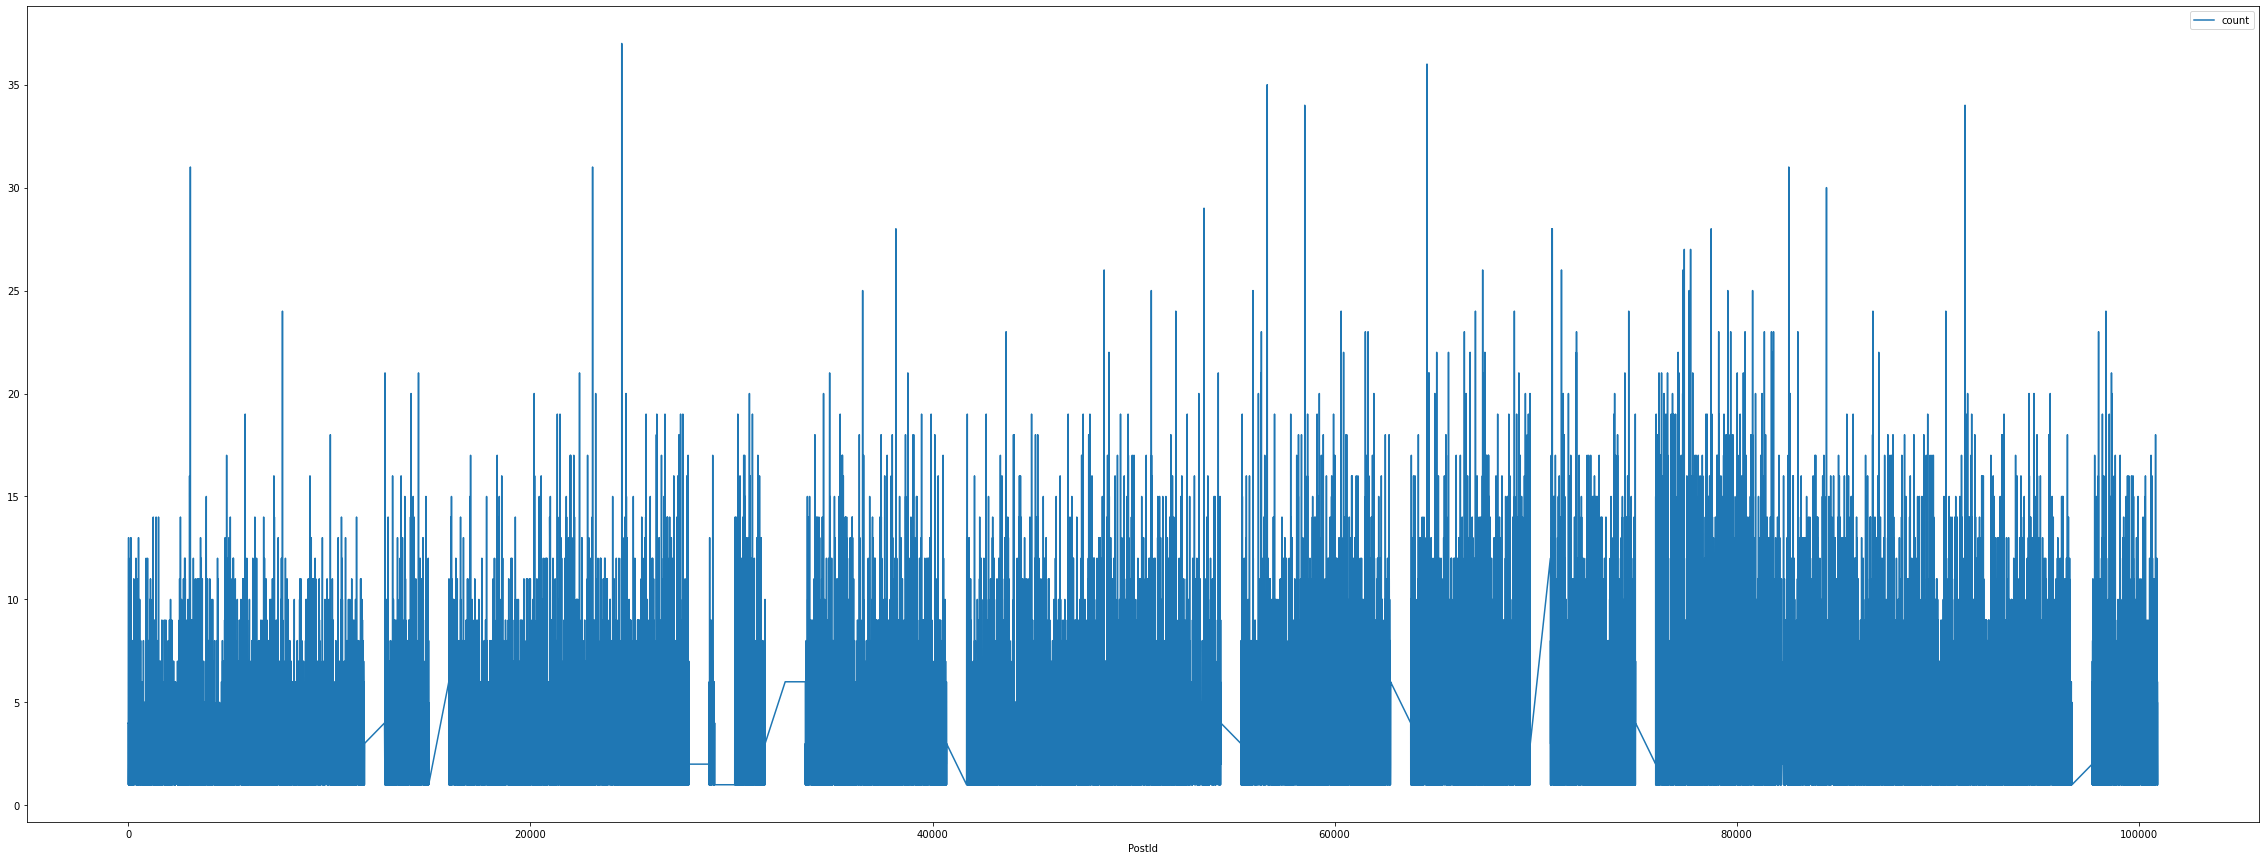

In [18]:
# ZADANIE 1

Comments_count = Comments.groupby(["PostId"])\
            .count()\
            .reset_index()\
            .drop(["CreationDate", "Score", "UserId"], axis = 1)\
            .rename(columns={'Id': 'count'})

Comments_count.plot(x = "PostId", y = 'count', figsize = (40,15))

In [14]:
# ZADANIE 2

ID = Posts.groupby(by = 'OwnerUserId')\
        .sum(['ViewCount'])\
        .sort_values(by = 'ViewCount', ascending = False)\
        .reset_index()\
        .loc[0,'OwnerUserId']

Users[Users['AccountId']==ID]['DisplayName']

1056    hitec
Name: DisplayName, dtype: object

In [15]:
# ZADANIE 3

NEW_Posts = pd.DataFrame(Posts['AcceptedAnswerId'])
NEW_Posts = NEW_Posts.rename(columns={'AcceptedAnswerId': 'Id'})

index = NEW_Posts.merge(Posts, on = 'Id')\
            .groupby(by = 'OwnerUserId')\
            .count().sort_values(by = 'Id', ascending = False)\
            .reset_index().loc[1,'OwnerUserId']
Users[Users['Id'] == index]['DisplayName']

1789    jpatokal
Name: DisplayName, dtype: object

In [36]:
# ZADANIE 4

NEW_Posts = pd.DataFrame(Posts['AcceptedAnswerId'])
NEW_Posts = NEW_Posts.rename(columns={'AcceptedAnswerId': 'Id'})
NEW_Posts = NEW_Posts.merge(Posts, on = 'Id').rename(columns={'Id': 'ID'})

Posts_123 = pd.DataFrame(Posts[Posts['PostTypeId']==2].groupby(by='ParentId').max('Score').reset_index().rename(columns = {'Score': 'SCORE'}))

Posts_123 = Posts_123.merge(NEW_Posts, on = 'ParentId')
len(Posts_123[Posts_123['Score']< Posts_123['SCORE']])/len(NEW_Posts)

0.09044220055710306